# This is an analysis of Ethereum. Ethereum is a decentralized, block chain platfrom used for its ether. Ether can be used as cryptocurrency or to run applications or to monetize work.  

# https://www.investopedia.com/terms/e/ethereum.asp

In [188]:
##https://www.kaggle.com/vagifa/ethereum-frauddetection-dataset

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
df = pd.read_csv('transaction_dataset.csv')
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421896,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


## EDA

## It looks like fraudsters try to limit their sent transactions but the transaction is usually sent to multiple accounts.

<AxesSubplot:xlabel='Sent tnx', ylabel='Received Tnx'>

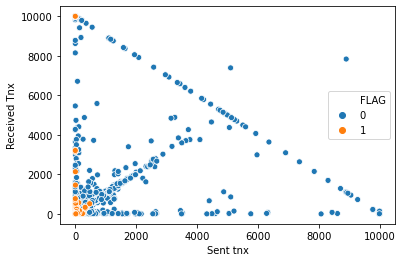

In [163]:
sns.scatterplot(x='Sent tnx', y='Received Tnx', hue='FLAG', data=df)

##  I think each point represents one account, I am not an expert in fraud or cryptocurrency.  To me, those who commit fraud usually send transactions over time and usually receive only 1 time or maybe even send it to a different account. A brief description for the variables is in the link to the dataset above.

<AxesSubplot:xlabel='Avg min between sent tnx', ylabel='Avg min between received tnx'>

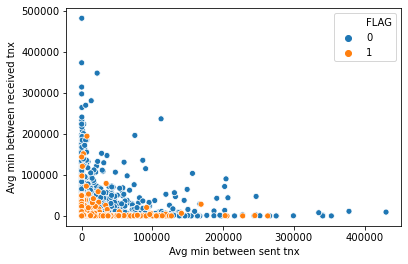

In [164]:
sns.scatterplot(x='Avg min between sent tnx', y='Avg min between received tnx', hue='FLAG', data=df)

## I thought the difference in the amount of ether sent and received would have a relationship to whether or not it is fraud.  From the scatter plot below it looks like, when it comes to fraud there is less variation in the amount received than the amount sent.

In [190]:
df['diff_value_sent'] = df['max val sent'] - df['min val sent']
df['diff_value_received'] = df['max value received '] - df['min value received']

<AxesSubplot:xlabel='diff_value_sent', ylabel='diff_value_received'>

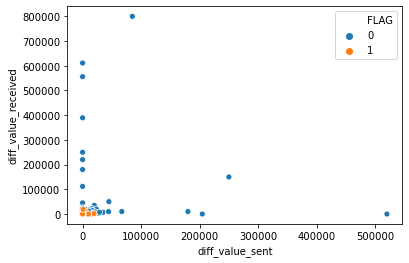

In [191]:
sns.scatterplot(x='diff_value_sent', y='diff_value_received', hue='FLAG', data=df)

## Cleaning most sent token type and most received token type and encoding them.

In [193]:
df[' ERC20 most sent token type'] = df[' ERC20 most sent token type'].astype(str)
df[' ERC20_most_rec_token_type'] = df[' ERC20_most_rec_token_type'].astype(str)

In [194]:
df[' ERC20 most sent token type'] = df[' ERC20 most sent token type'].apply(lambda x: x.lower())
df[' ERC20_most_rec_token_type'] = df[' ERC20_most_rec_token_type'].apply(lambda x: x.lower())

In [195]:
df[' ERC20 most sent token type'] = df[' ERC20 most sent token type'].apply(lambda x: x.encode('ascii', 'ignore').decode())
df[' ERC20_most_rec_token_type'] = df[' ERC20_most_rec_token_type'].apply(lambda x: x.encode('ascii', 'ignore').decode())

In [196]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df[' ERC20 most sent token type'] = df[' ERC20 most sent token type'].apply(lambda x:' '.join([word for word in x.split() if word not in stop]))
df[' ERC20_most_rec_token_type'] = df[' ERC20_most_rec_token_type'].apply(lambda x:' '.join([word for word in x.split() if word not in stop]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [197]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

In [198]:
df[' ERC20 most sent token type'] = df[' ERC20 most sent token type'].apply(punctuation_removal)
df[' ERC20_most_rec_token_type'] = df[' ERC20_most_rec_token_type'].apply(punctuation_removal)

In [199]:
df['sent_Top20'] = df[' ERC20 most sent token type'].sort_values(ascending=False).head(20)
df['Rec_Top20'] = df[' ERC20_most_rec_token_type'].sort_values(ascending=False).head(20)

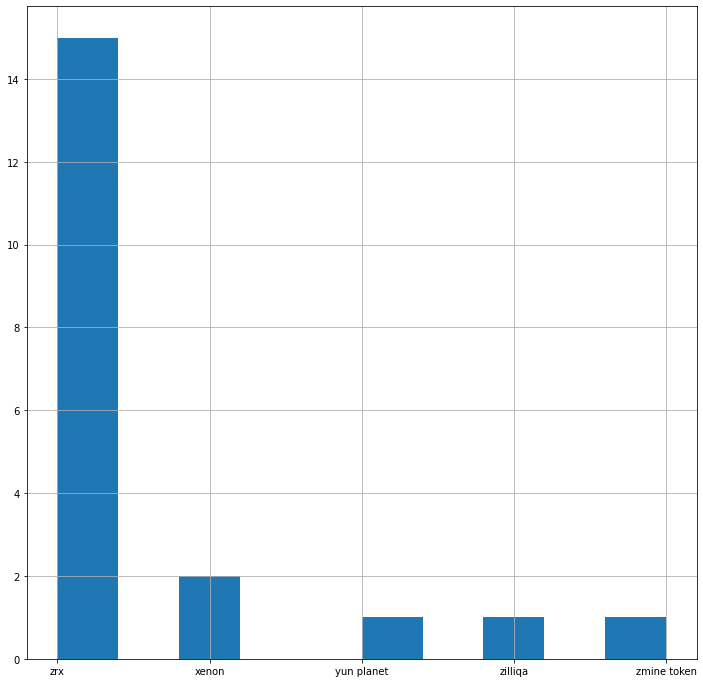

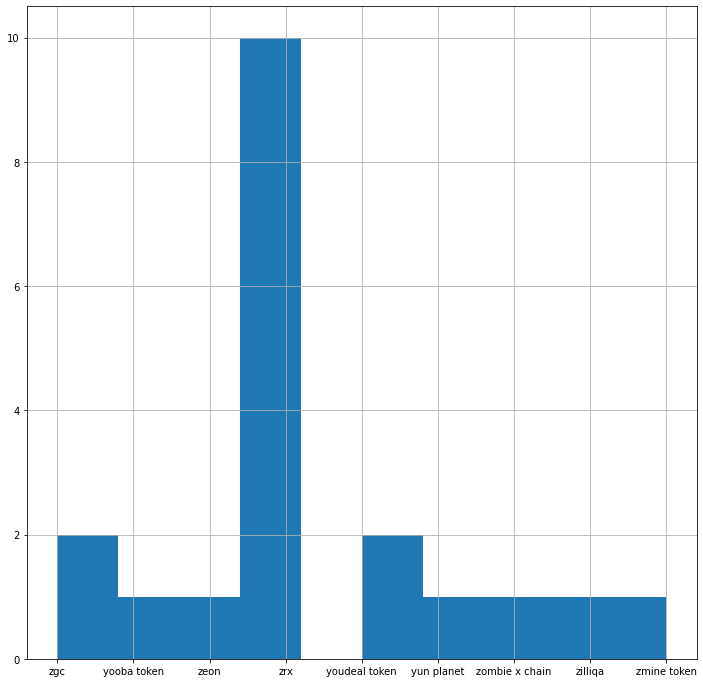

In [200]:
plt.figure(figsize=(12,12))
df['sent_Top20'].hist()
plt.show()
plt.figure(figsize=(12,12))
df['Rec_Top20'].hist()
plt.show()

In [175]:
df['sent_Top20'].value_counts()

zrx            15
xenon           2
zilliqa         1
zmine token     1
yun planet      1
Name: sent_Top20, dtype: int64

In [176]:
df['Rec_Top20'].value_counts()

zrx               10
zgc                2
youdeal token      2
zilliqa            1
yooba token        1
zmine token        1
zombie x chain     1
zeon               1
yun planet         1
Name: Rec_Top20, dtype: int64

In [177]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sent_token_enc'] = le.fit_transform(df[' ERC20 most sent token type'])
df['Rec_token_enc'] = le.fit_transform(df[' ERC20_most_rec_token_type'])

In [178]:
print(df['Rec_token_enc'].nunique())
print(df['sent_token_enc'].nunique())

466
302


## More EDA

In [179]:
df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,diff_value_sent,diff_value_received,sent_token_enc,Rec_token_enc
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9012.000000,9.012000e+03,9.012000e+03,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.0,9012.0,9012.0,9012.0,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000,9841.000000,9841.000000,9841.000000,9841.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,0.000003,0.000008,0.000005,283.362362,1.016092e+04,1.163832e+04,0.000008,1.477395e+03,36.255659,1.296207e+08,1.386849e+07,110.939207,5.638038,7.598535,0.003440,4.901909,0.0,0.0,0.0,0.0,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676,309.817207,479.307327,76.299360,130.703181
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,0.000225,0.000516,0.000323,1352.404013,3.583227e+05,3.642048e+05,0.000516,2.424254e+05,447.528908,1.053858e+10,1.180390e+09,6128.634953,105.252500,81.818470,0.065698,17.246576,0.0,0.0,0.0,0.0,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607,6627.520302,13004.198274,93.075203,147.593882
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,0.000000,0.000000,0.000000,4.000000,2.262059e-01,2.670424e+00,0.000000,6.214900e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,0.000000,0.0000

In [180]:
fraud = df.drop(['Unnamed: 0', 'Index','Unique Received From Addresses','Unique Sent To Addresses',
                'avg val received','avg value sent to contract'],axis=1)

In [181]:
created = df[[' ERC20 uniq sent token name',' ERC20 uniq rec token name','diff_value_sent',
              'diff_value_received','sent_token_enc','Rec_token_enc']]

In [182]:
fraud = fraud[fraud.columns[0:20]]

In [183]:
fraud = fraud.join(created)

In [184]:
fraud = fraud.dropna()

## There is a strong correlation between 1. the minutes between first and last transactions and the diiference in the value of ehter received 2. total transactions and max value of ether sent 3. max value of ether sent and difference in value sent 4. the token name and the value received.

<AxesSubplot:>

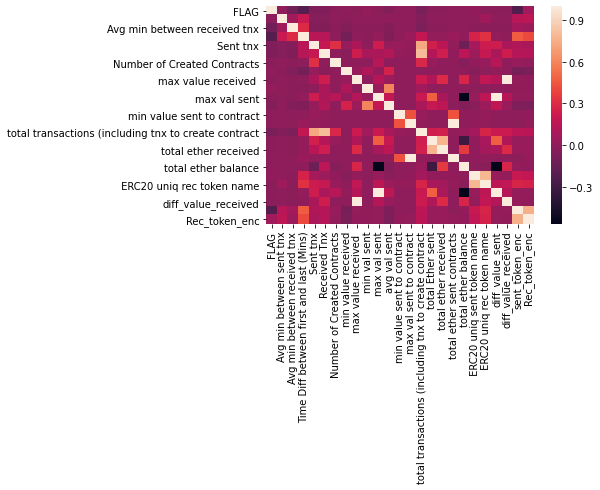

In [185]:
sns.heatmap(fraud.corr())

In [186]:
fraud.columns

Index(['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'min value received',
       'max value received ', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' ERC20 uniq sent token name', ' ERC20 uniq rec token name',
       'diff_value_sent', 'diff_value_received', 'sent_token_enc',
       'Rec_token_enc'],
      dtype='object')

<AxesSubplot:xlabel='total transactions (including tnx to create contract', ylabel='total Ether sent'>

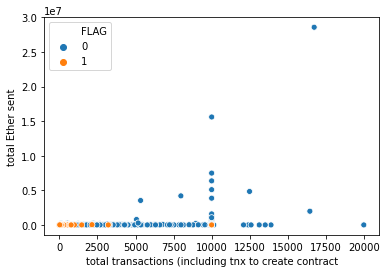

In [204]:
sns.scatterplot(x='total transactions (including tnx to create contract',y='total Ether sent',hue='FLAG', data= fraud)

## There are many concerns that come from fraud and money laundering including corruption, terrorism financing, putting legitamate businesses out of business, encouraging bribery and more.  With the advances in block chain and cryptocurrency technology, it is giving criminals the advantage of anonymity.  Stopping money laundering is a key component to fighting corruption, terrorism and illicit trade.